In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sn

Training Dataset

In [ ]:
df = pd.read_csv("hackathon_train.csv", parse_dates=['Dates'])
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2011-12-04 18:15:00,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Sunday,PARK,NONE,100 Block of BEULAH ST,-122.452331,37.767356
1,2009-01-11 19:57:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Sunday,MISSION,"ARREST, BOOKED",18TH ST / CAPP ST,-122.418272,37.761903
2,2007-01-25 18:15:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,CENTRAL,NONE,1200 Block of STOCKTON ST,-122.408521,37.797492
3,2012-01-10 08:55:00,ROBBERY,"ROBBERY, BODILY FORCE",Tuesday,NORTHERN,NONE,HAYES ST / FRANKLIN ST,-122.421333,37.777090
4,2014-05-27 12:25:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,TENDERLOIN,NONE,JONES ST / TURK ST,-122.412414,37.783004


In [ ]:
df.dtypes

Dates         datetime64[ns]
Category              object
Descript              object
DayOfWeek             object
PdDistrict            object
Resolution            object
Address               object
X                    float64
Y                    float64
dtype: object

All of our columns are of object type, so we need to figure out a way through which we can encode this data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658536 entries, 0 to 658535
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       658536 non-null  datetime64[ns]
 1   Category    658536 non-null  object        
 2   Descript    658536 non-null  object        
 3   DayOfWeek   658536 non-null  object        
 4   PdDistrict  658536 non-null  object        
 5   Resolution  658536 non-null  object        
 6   Address     658536 non-null  object        
 7   X           658536 non-null  float64       
 8   Y           658536 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 45.2+ MB


In [ ]:
def get_null_value_analysis():
    # This given count of null values for each of the column
    null_values = df.isna().sum().sort_values(ascending=False).to_frame()
    null_values = null_values.loc[null_values[0] > 0]
    null_values['percentage_null'] = null_values[0]/len(df)*100
    return null_values

null_values = get_null_value_analysis()
null_values

,0,percentage_null


Only one column has missing data (i.e Y), so for that column we have don't have the Y coordinate

In [ ]:
# Finding the particular row that has empty Y value
df.isna().any(axis=1)

0         False
1         False
2         False
3         False
4         False
          ...  
658531    False
658532    False
658533    False
658534    False
658535    False
Length: 658536, dtype: bool

In [ ]:
df.tail()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
658531,2008-11-12 16:30:00,MISSING PERSON,FOUND PERSON,Wednesday,NORTHERN,NONE,2400 Block of JACKSON ST,-122.435385,37.792311
658532,2012-10-31 22:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,SOUTHERN,NONE,FOLSOM ST / 4TH ST,-122.401162,37.782024
658533,2015-05-12 15:25:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,CENTRAL,NONE,400 Block of STOCKTON ST,-122.406978,37.789918
658534,2015-04-14 00:20:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Tuesday,INGLESIDE,"ARREST, BOOKED",4500 Block of MISSION ST,-122.434156,37.725426
658535,2015-03-18 07:30:00,NON-CRIMINAL,AIDED CASE -PROPERTY FOR DESTRUCTION,Wednesday,TARAVAL,NONE,300 Block of MORAGA ST,-122.466340,37.756612


Since only 1 row is missing out of around 45k records, we can drop this row altogether

In [ ]:
#df = df[:-1]
df.tail()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
658531,2008-11-12 16:30:00,MISSING PERSON,FOUND PERSON,Wednesday,NORTHERN,NONE,2400 Block of JACKSON ST,-122.435385,37.792311
658532,2012-10-31 22:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,SOUTHERN,NONE,FOLSOM ST / 4TH ST,-122.401162,37.782024
658533,2015-05-12 15:25:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,CENTRAL,NONE,400 Block of STOCKTON ST,-122.406978,37.789918
658534,2015-04-14 00:20:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Tuesday,INGLESIDE,"ARREST, BOOKED",4500 Block of MISSION ST,-122.434156,37.725426
658535,2015-03-18 07:30:00,NON-CRIMINAL,AIDED CASE -PROPERTY FOR DESTRUCTION,Wednesday,TARAVAL,NONE,300 Block of MORAGA ST,-122.466340,37.756612


Sanity check for Latitudes and Longitudes

In [ ]:
df.describe()

,X,Y
count,658536.000000,658536.000000
mean,-122.422619,37.770844
std,0.030156,0.446577
min,-122.513642,37.707879
25%,-122.432952,37.752441
50%,-122.416398,37.775421
75%,-122.406926,37.784353
max,-120.500000,90.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


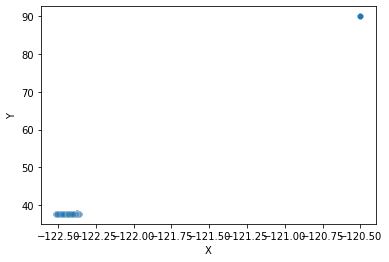

In [ ]:
sn.scatterplot(df["X"], df["Y"], alpha=0.1)

We can clearly see that something is off with the coordinates

When we google for lang and lat for SFO border are as follows:

top = 38.2033 (Latitude at top edge of map, in decimal degrees)

bottom = 37.1897 (Latitude at bottom edge of map, in decimal degrees)

left = -122.6445 (Longitude at left edge of map, in decimal degrees)

right = -121.5871 (Longitude at right edge of map, in decimal degrees)

In [ ]:
df = df.loc[df["Y"] < 38.3]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


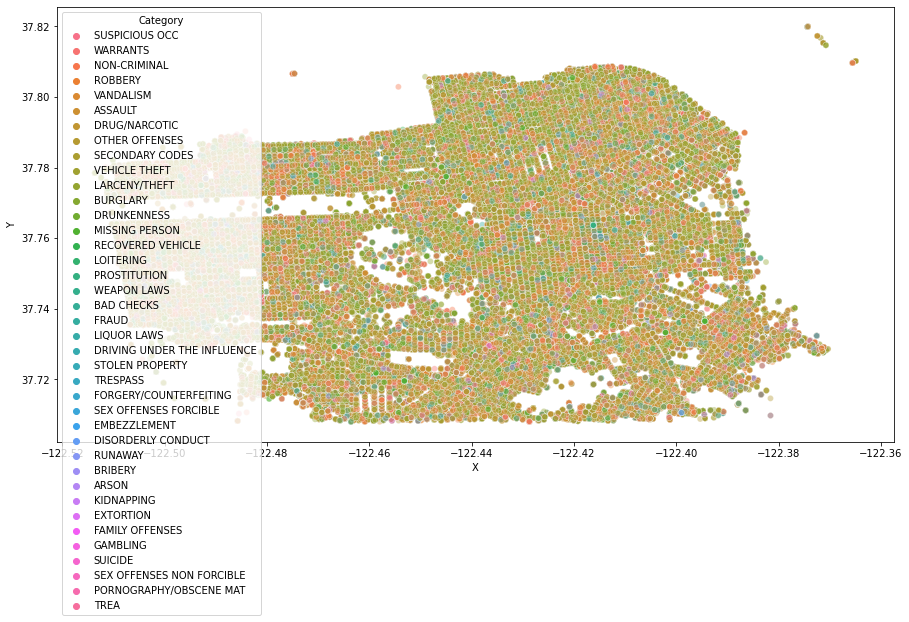

In [ ]:
plt.figure(figsize=(15,8))
sn.scatterplot(df["X"], df["Y"], hue=df["Category"], alpha=0.4)

In [ ]:
df["PdDistrict"].unique()

array(['PARK', 'MISSION', 'CENTRAL', 'NORTHERN', 'TENDERLOIN', 'SOUTHERN',
       'INGLESIDE', 'RICHMOND', 'BAYVIEW', 'TARAVAL'], dtype=object)

In [ ]:
len(df["Descript"].unique())

862

In [ ]:
# word_vector = set()

# for index, row in df.iterrows():
#     row_words = row['Descript'].split(",")
#     for word in row_words:
#         word_vector.add(word)

# print(word_vector)

In [ ]:
# len(word_vector)

In [ ]:
# sn.pairplot(df)

In [ ]:
df["Resolution"].unique()

array(['NONE', 'ARREST, BOOKED', 'PSYCHOPATHIC CASE', 'JUVENILE DIVERTED',
       'JUVENILE BOOKED', 'ARREST, CITED', 'UNFOUNDED', 'LOCATED',
       'NOT PROSECUTED', 'COMPLAINANT REFUSES TO PROSECUTE',
       'JUVENILE CITED', 'DISTRICT ATTORNEY REFUSES TO PROSECUTE',
       'JUVENILE ADMONISHED', 'EXCEPTIONAL CLEARANCE',
       'PROSECUTED BY OUTSIDE AGENCY',
       'CLEARED-CONTACT JUVENILE FOR MORE INFO',
       'PROSECUTED FOR LESSER OFFENSE'], dtype=object)

In [ ]:
action_not_taken_group = ["NONE", "UNFOUNDED", "NOT PROSECUTED"]

df["action_taken"] = df["Resolution"].isin(action_not_taken_group)
df["action_taken"]

0          True
1         False
2          True
3          True
4          True
          ...  
658531     True
658532     True
658533     True
658534    False
658535     True
Name: action_taken, Length: 658488, dtype: bool

In [ ]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,action_taken
0,2011-12-04 18:15:00,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Sunday,PARK,NONE,100 Block of BEULAH ST,-122.452331,37.767356,True
1,2009-01-11 19:57:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Sunday,MISSION,"ARREST, BOOKED",18TH ST / CAPP ST,-122.418272,37.761903,False
2,2007-01-25 18:15:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,CENTRAL,NONE,1200 Block of STOCKTON ST,-122.408521,37.797492,True
3,2012-01-10 08:55:00,ROBBERY,"ROBBERY, BODILY FORCE",Tuesday,NORTHERN,NONE,HAYES ST / FRANKLIN ST,-122.421333,37.777090,True
4,2014-05-27 12:25:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,TENDERLOIN,NONE,JONES ST / TURK ST,-122.412414,37.783004,True


Say for example in an area, 3 crimes are taking place with equal frequency

The ratio of action taken or not can be used to determine which crime of the 3 is more probable

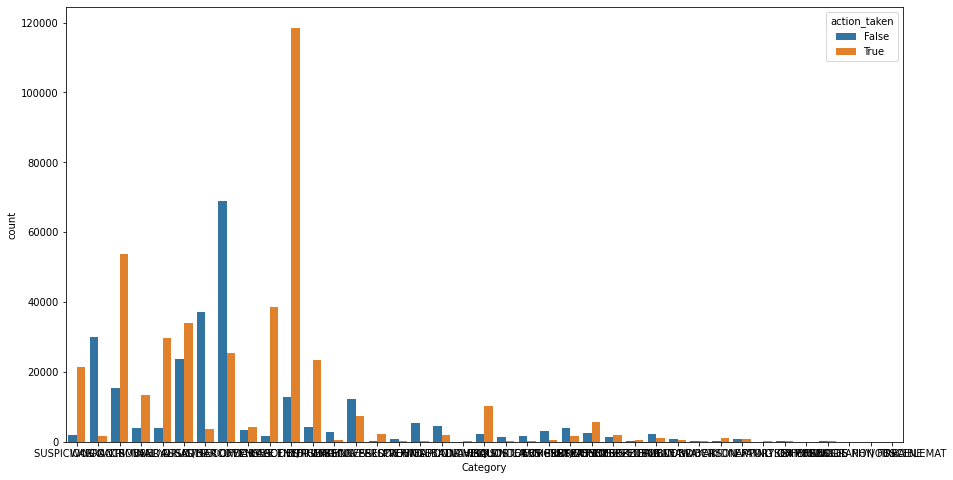

In [ ]:
plt.figure(figsize=(15,8))
sn.countplot(x="Category", hue="action_taken", data=df)

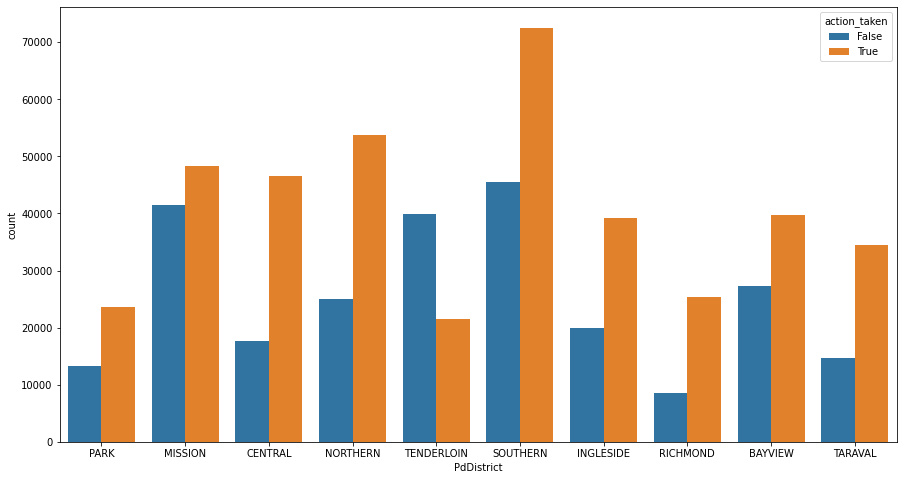

In [ ]:
plt.figure(figsize=(15,8))
sn.countplot(x="PdDistrict", hue="action_taken", data=df)

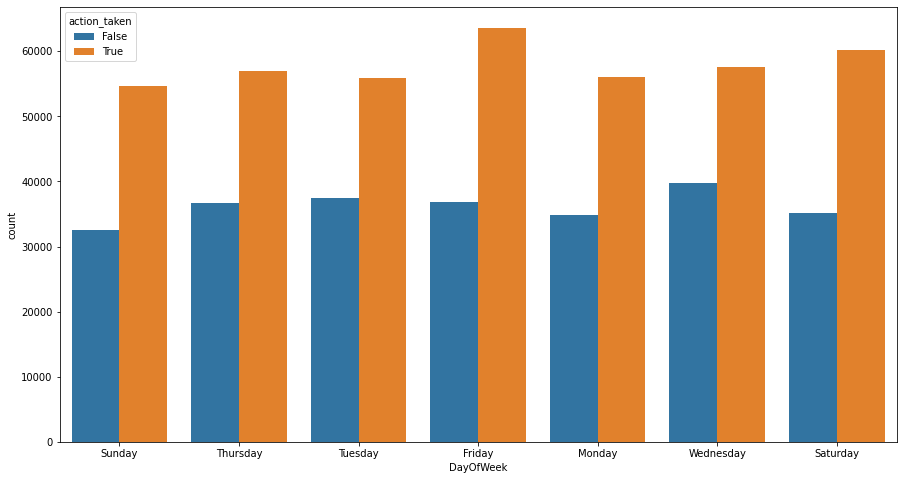

In [ ]:
plt.figure(figsize=(15,8))
sn.countplot(x="DayOfWeek", hue="action_taken", data=df)

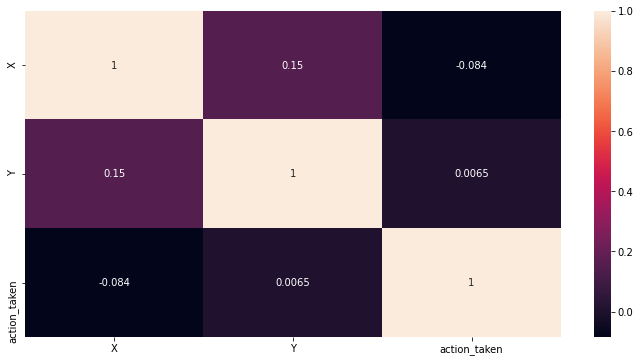

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12,6))
sn.heatmap(correlation_matrix, annot=True)

Frequency of each column

In [ ]:
df['Category'].value_counts()

LARCENY/THEFT                  131276
OTHER OFFENSES                  94449
NON-CRIMINAL                    69315
ASSAULT                         57573
DRUG/NARCOTIC                   40621
VEHICLE THEFT                   40376
VANDALISM                       33541
WARRANTS                        31656
BURGLARY                        27482
SUSPICIOUS OCC                  23477
MISSING PERSON                  19554
ROBBERY                         17218
FRAUD                           12418
FORGERY/COUNTERFEITING           8042
SECONDARY CODES                  7518
WEAPON LAWS                      6378
PROSTITUTION                     5616
TRESPASS                         5532
STOLEN PROPERTY                  3444
SEX OFFENSES FORCIBLE            3301
DISORDERLY CONDUCT               3251
DRUNKENNESS                      3207
RECOVERED VEHICLE                2329
KIDNAPPING                       1725
DRIVING UNDER THE INFLUENCE      1718
RUNAWAY                          1428
LIQUOR LAWS 

In [ ]:
df['PdDistrict'].value_counts()

SOUTHERN      118134
MISSION        89791
NORTHERN       78693
BAYVIEW        67057
CENTRAL        64201
TENDERLOIN     61356
INGLESIDE      59171
TARAVAL        49200
PARK           36859
RICHMOND       34026
Name: PdDistrict, dtype: int64

In [ ]:
df['DayOfWeek'].value_counts()

Friday       100495
Wednesday     97303
Saturday      95294
Thursday      93746
Tuesday       93388
Monday        90990
Sunday        87272
Name: DayOfWeek, dtype: int64

In [ ]:
df['action_taken'].value_counts()

True     405112
False    253376
Name: action_taken, dtype: int64

In [ ]:
x_temp = df.groupby(["PdDistrict","action_taken"]).size()



In [ ]:
ratios = []

ratio_map = {}

distrcits = sorted(df["PdDistrict"].unique())
print(distrcits)

for i in range(0, 20, 2):
    ratios.append(x_temp[i+1]/x_temp[i])

for i in range(0, len(ratios)):
    ratio_map[distrcits[i]] = ratios[i]

ratio_map

['BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN']


{'BAYVIEW': 1.4540530649588288,
 'CENTRAL': 2.6347732548264733,
 'INGLESIDE': 1.9582541745825417,
 'MISSION': 1.1655170750530581,
 'NORTHERN': 2.145706747681484,
 'PARK': 1.7921369593212635,
 'RICHMOND': 2.95559172285515,
 'SOUTHERN': 1.5912261460846677,
 'TARAVAL': 2.359049634737489,
 'TENDERLOIN': 0.5390558370541313}

In [ ]:
encoding_district = {}
dist_freq =  df["PdDistrict"].value_counts().sort_index(ascending=True)
index = 0
for key in ratio_map:
    encoding_district[key] = dist_freq[index] * ratio_map[key]
    index+=1

encoding_district

{'BAYVIEW': 97504.43637694418,
 'CENTRAL': 169155.07773311442,
 'INGLESIDE': 115871.85776422358,
 'MISSION': 104652.94368608914,
 'NORTHERN': 168852.101095299,
 'PARK': 66056.37618362244,
 'RICHMOND': 100566.96396186933,
 'SOUTHERN': 187977.90954156613,
 'TARAVAL': 116065.24202908446,
 'TENDERLOIN': 33074.30993829328}

In [ ]:
df["PdDistrict"] = df.replace(encoding_district)["PdDistrict"]
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,action_taken
0,2011-12-04 18:15:00,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Sunday,66056.376184,NONE,100 Block of BEULAH ST,-122.452331,37.767356,True
1,2009-01-11 19:57:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Sunday,104652.943686,"ARREST, BOOKED",18TH ST / CAPP ST,-122.418272,37.761903,False
2,2007-01-25 18:15:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,169155.077733,NONE,1200 Block of STOCKTON ST,-122.408521,37.797492,True
3,2012-01-10 08:55:00,ROBBERY,"ROBBERY, BODILY FORCE",Tuesday,168852.101095,NONE,HAYES ST / FRANKLIN ST,-122.421333,37.777090,True
4,2014-05-27 12:25:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,33074.309938,NONE,JONES ST / TURK ST,-122.412414,37.783004,True


In [ ]:

from collections import defaultdict

day_freq = defaultdict(list)
for (k,v) in df["DayOfWeek"].value_counts().items():
    day_freq[k].append(v)

day_freq

defaultdict(list,
            {'Friday': [100495],
             'Monday': [90990],
             'Saturday': [95294],
             'Sunday': [87272],
             'Thursday': [93746],
             'Tuesday': [93388],
             'Wednesday': [97303]})

In [ ]:
encoding_days = {}

for key in day_freq:
    encoding_days[key] = day_freq[key][0]

encoding_days

{'Friday': 100495,
 'Monday': 90990,
 'Saturday': 95294,
 'Sunday': 87272,
 'Thursday': 93746,
 'Tuesday': 93388,
 'Wednesday': 97303}

In [ ]:
df["DayOfWeek"] = df.replace(encoding_days)["DayOfWeek"]
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,action_taken
0,2011-12-04 18:15:00,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,87272,66056.376184,NONE,100 Block of BEULAH ST,-122.452331,37.767356,True
1,2009-01-11 19:57:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,87272,104652.943686,"ARREST, BOOKED",18TH ST / CAPP ST,-122.418272,37.761903,False
2,2007-01-25 18:15:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",93746,169155.077733,NONE,1200 Block of STOCKTON ST,-122.408521,37.797492,True
3,2012-01-10 08:55:00,ROBBERY,"ROBBERY, BODILY FORCE",93388,168852.101095,NONE,HAYES ST / FRANKLIN ST,-122.421333,37.777090,True
4,2014-05-27 12:25:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",93388,33074.309938,NONE,JONES ST / TURK ST,-122.412414,37.783004,True


Drop the description as from NLP analysis, it is not much helpful

In [ ]:
del df["Resolution"]
del df["action_taken"]
del df["Descript"]
del df["Address"]
df.head()

,Dates,Category,DayOfWeek,PdDistrict,X,Y
0,2011-12-04 18:15:00,SUSPICIOUS OCC,87272,66056.376184,-122.452331,37.767356
1,2009-01-11 19:57:00,WARRANTS,87272,104652.943686,-122.418272,37.761903
2,2007-01-25 18:15:00,NON-CRIMINAL,93746,169155.077733,-122.408521,37.797492
3,2012-01-10 08:55:00,ROBBERY,93388,168852.101095,-122.421333,37.777090
4,2014-05-27 12:25:00,VANDALISM,93388,33074.309938,-122.412414,37.783004


In [ ]:
df["Day"] = df["Dates"].dt.day
df['Month'] = df['Dates'].dt.month
df['Year'] = df['Dates'].dt.year
df['Hour'] = df['Dates'].dt.hour
del df["Dates"]
df.head()

,Category,DayOfWeek,PdDistrict,X,Y,Day,Month,Year,Hour
0,SUSPICIOUS OCC,87272,66056.376184,-122.452331,37.767356,4,12,2011,18
1,WARRANTS,87272,104652.943686,-122.418272,37.761903,11,1,2009,19
2,NON-CRIMINAL,93746,169155.077733,-122.408521,37.797492,25,1,2007,18
3,ROBBERY,93388,168852.101095,-122.421333,37.777090,10,1,2012,8
4,VANDALISM,93388,33074.309938,-122.412414,37.783004,27,5,2014,12


In [ ]:
X = df[ ["DayOfWeek","PdDistrict","X","Y","Year", "Month", "Hour"]]
y = df["Category"]

In [ ]:
X.head()

,DayOfWeek,PdDistrict,X,Y,Year,Month,Hour
0,87272,66056.376184,-122.452331,37.767356,2011,12,18
1,87272,104652.943686,-122.418272,37.761903,2009,1,19
2,93746,169155.077733,-122.408521,37.797492,2007,1,18
3,93388,168852.101095,-122.421333,37.777090,2012,1,8
4,93388,33074.309938,-122.412414,37.783004,2014,5,12


In [ ]:
y.head()

0    SUSPICIOUS OCC
1          WARRANTS
2      NON-CRIMINAL
3           ROBBERY
4         VANDALISM
Name: Category, dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

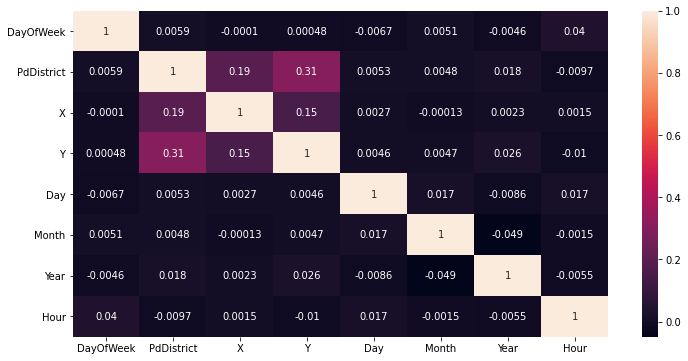

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12,6))
sn.heatmap(correlation_matrix, annot=True)

TESTING THE MODEL

In [ ]:
test_df = pd.read_csv('hackathon_test.csv', parse_dates=['Dates'])

In [ ]:
del test_df["Address"]
del test_df["Id"]

test_df["DayOfWeek"] = test_df.replace(encoding_days)["DayOfWeek"]
test_df["PdDistrict"] = test_df.replace(encoding_district)["PdDistrict"]

test_df["Day"] = test_df["Dates"].dt.day
test_df['Month'] = test_df['Dates'].dt.month
test_df['Year'] = test_df['Dates'].dt.year
test_df['Hour'] = test_df['Dates'].dt.hour
del test_df["Dates"]


test_df.head()

,DayOfWeek,PdDistrict,X,Y,Day,Month,Year,Hour
0,90990,104652.943686,-122.428814,37.766808,2,3,2015,14
1,100495,97504.436377,-122.401829,37.735606,23,1,2004,20
2,87272,33074.309938,-122.410509,37.786043,12,1,2014,0
3,87272,187977.909542,-122.400916,37.785457,28,8,2005,0
4,95294,169155.077733,-122.408600,37.800460,3,11,2007,10


In [ ]:
X_test = test_df[ ["DayOfWeek","PdDistrict","X","Y","Year", "Month", "Hour"]]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
predictions = pd.DataFrame(
    0,
    index=test.index,
    columns=['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
       'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION',
       'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING',
       'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING',
       'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES',
       'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE',
       'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE',
       'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE',
       'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT',
       'WARRANTS', 'WEAPON LAWS']
)
predictions.head()